For reference https://medium.com/mlearning-ai/customer-segmentation-using-k-means-clustering-ae73e3d82934 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
#read the csv and display data
df= pd.read_csv('customers.csv', index_col = 0) #loads the csv file into a pandas dataframe
df.head() 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
#code to rename columns if needed
#df.rename(columns= {'Genre': 'Gender'}, inplace = True) #To rename column 2 from Genre to Gender
#df.head()

In [6]:
#checking data types of dataframe
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [13]:
df.shape

(200, 4)

In [14]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [16]:
#checks for NuLL data
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [22]:
#feature selection
#selecting annual income and spending score as features
X=df.iloc[:,2:4].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [23]:
#Normalizing the data 
scaler=MinMaxScaler()
model=scaler.fit(X)
normal_data=model.transform(X)
print(normal_data)

[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.01639344 0.76530612]
 [0.02459016 0.05102041]
 [0.02459016 0.94897959]
 [0.03278689 0.02040816]
 [0.03278689 0.7244898 ]
 [0.03278689 0.13265306]
 [0.03278689 1.        ]
 [0.04098361 0.14285714]
 [0.04098361 0.7755102 ]
 [0.04098361 0.12244898]
 [0.04098361 0.79591837]
 [0.04918033 0.34693878]
 [0.04918033 0.66326531]
 [0.06557377 0.28571429]
 [0.06557377 0.98979592]
 [0.07377049 0.34693878]
 [0.07377049 0.73469388]
 [0.08196721 0.04081633]
 [0.08196721 0.73469388]
 [0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.10655738 0.31632653]
 [0.10655738 0.6122449 ]
 [0.1147541  0.30612245]
 [0.1147541  0.87755102]
 [0.12295082 0.03061224]
 [0.12295082 0.73469388]
 [0.14754098 0.03061224]
 [0.14754098 0.92857143]
 [0.14754098 0.13265306]
 [0.14754098 0.81632653]
 [0.1557377  0.16326531]
 [0.1557377  0.73469388]
 [0.18032787 0.25510204]
 [0.18032787 0.75510204]


In [25]:
direct_normal_data=scaler.fit_transform(X)
print(direct_normal_data)

[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.01639344 0.76530612]
 [0.02459016 0.05102041]
 [0.02459016 0.94897959]
 [0.03278689 0.02040816]
 [0.03278689 0.7244898 ]
 [0.03278689 0.13265306]
 [0.03278689 1.        ]
 [0.04098361 0.14285714]
 [0.04098361 0.7755102 ]
 [0.04098361 0.12244898]
 [0.04098361 0.79591837]
 [0.04918033 0.34693878]
 [0.04918033 0.66326531]
 [0.06557377 0.28571429]
 [0.06557377 0.98979592]
 [0.07377049 0.34693878]
 [0.07377049 0.73469388]
 [0.08196721 0.04081633]
 [0.08196721 0.73469388]
 [0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.10655738 0.31632653]
 [0.10655738 0.6122449 ]
 [0.1147541  0.30612245]
 [0.1147541  0.87755102]
 [0.12295082 0.03061224]
 [0.12295082 0.73469388]
 [0.14754098 0.03061224]
 [0.14754098 0.92857143]
 [0.14754098 0.13265306]
 [0.14754098 0.81632653]
 [0.1557377  0.16326531]
 [0.1557377  0.73469388]
 [0.18032787 0.25510204]
 [0.18032787 0.75510204]


In [26]:
#training the dataset 
kmeans= KMeans(n_clusters = 5, init = 'k-means++') #initialize the class object
label= kmeans.fit_predict(X) #returns a cluster number for each of the data points
print(label)

c:\Users\ERROL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [27]:
#centroids of the clusters
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


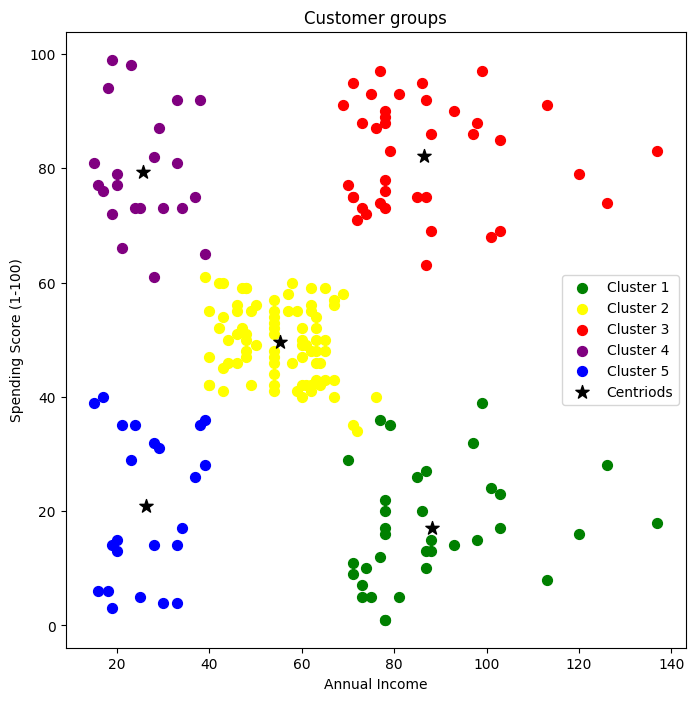

In [28]:
#visualizing all the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[label == 0,0], X[label== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[label == 1,0], X[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[label == 2,0], X[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[label == 3,0], X[label== 3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[label == 4,0], X[label== 4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show() 

In [29]:
trained_data=kmeans.fit(X)
print(trained_data.labels_)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 4 0 2 0 2 0 4 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


c:\Users\ERROL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
